# ✈️ Airlines Flights Dataset Analysis
## Flight Booking Data for Various Cities in India

---

### 📊 Dataset Overview

The **Flights Booking Dataset** contains scraped data from a famous travel website, structured to provide comprehensive insights into flight travel details between cities in India. This dataset is ideal for professionals working in the **Airlines and Travel domain** and offers valuable insights into pricing patterns, airline operations, and travel trends.

**Data Format:** CSV  
**Analysis Tool:** Pandas DataFrame  
**Domain:** Airlines & Travel Industry

---

## 🎯 Research Questions

This project addresses the following analytical questions:

1. **Q.1** - What are the airlines in the dataset, accompanied by their frequencies?

2. **Q.2** - Show Bar Graphs representing the Departure Time & Arrival Time.

3. **Q.3** - Show Bar Graphs representing the Source City & Destination City.

4. **Q.4** - Does price vary with airlines?

5. **Q.5** - Does ticket price change based on the departure time and arrival time?

6. **Q.6** - How does the price change with change in Source and Destination?

7. **Q.7** - How is the price affected when tickets are bought in just 1 or 2 days before departure?

8. **Q.8** - How does the ticket price vary between Economy and Business class?

9. **Q.9** - What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class?

---

## 📋 Dataset Features

### Categorical Features:

| Feature | Description | Unique Values |
|---------|-------------|---------------|
| **Airline** | Name of the airline company | 6 different airlines |
| **Flight** | Plane's flight code | Multiple unique codes |
| **Source City** | City from which the flight takes off | 6 unique cities |
| **Departure Time** | Derived feature - Time periods grouped into bins | 6 unique time labels |
| **Stops** | Number of stops between source and destination | 3 distinct values |
| **Arrival Time** | Derived feature - Time intervals grouped into bins | 6 distinct time labels |
| **Destination City** | City where the flight will land | 6 unique cities |
| **Class** | Seat class information | 2 values (Business & Economy) |

### Continuous Features:

| Feature | Description | Type |
|---------|-------------|------|
| **Duration** | Total travel time between cities (in hours) | Continuous |
| **Days Left** | Derived feature: Trip date - Booking date | Continuous |
| **Price** | Ticket price | **Target Variable** |

---

## 📝 Detailed Feature Descriptions

1. **Airline**: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2. **Flight**: Flight stores information regarding the plane's flight code. It is a categorical feature.

3. **Source City**: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4. **Departure Time**: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5. **Stops**: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6. **Arrival Time**: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7. **Destination City**: City where the flight will land. It is a categorical feature having 6 unique cities.

8. **Class**: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9. **Duration**: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10. **Days Left**: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11. **Price**: Target variable stores information of the ticket price.

<div style="background: linear-gradient(135deg, #ff6b6b 0%, #ff8e53 50%, #ffa726 100%); padding: 30px 35px; border-radius: 15px; color: #ffffff; margin: 25px 0; box-shadow: 0 10px 25px rgba(255, 107, 107, 0.4);">
    <h3 style="color: #ffffff; margin: 0 0 15px 0; font-size: 1.7rem; font-weight: 700;">👨‍💻 Project Information</h3>
    <div style="line-height: 1.8;">
        <strong>Author:</strong> Sajjad Ali Shah<br>
        <strong>LinkedIn:</strong> <a href="https://www.linkedin.com/in/sajjad-ali-shah47/" target="_blank" style="color: #ffffff; text-decoration: underline;">Connect with me</a><br>
        <strong>Dataset:</strong> <a href="https://www.kaggle.com/datasets/rohitgrewal/airlines-flights-data/data" target="_blank" style="color: #ffffff; text-decoration: underline;">Airlines Flights Dataset on Kaggle</a>
    </div>
</div>

<div style="background: linear-gradient(135deg, #ff6b6b 0%, #ff8e53 50%, #ffa726 100%); padding: 30px 35px; border-radius: 15px; color: #ffffff; margin: 25px 0; box-shadow: 0 10px 25px rgba(255, 107, 107, 0.4);">
    <h3 style="color: #ffffff; margin: 0 0 15px 0; font-size: 1.7rem; font-weight: 700; text-align: center;">📚 Import Libraries</h3>
    
</div>

In [3]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.seasonal as sts
import warnings
warnings.filterwarnings("ignore")


In [4]:
# load the data
df=pd.read_csv("Data/airlines_flights_data.csv")

In [5]:
# check the data shape info  and the first 5 rows
print(df.shape)

print("="*50)

print(df.info())

print("="*50)

df.head()

(300153, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
# check the missing values
print(df.isnull().sum())

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [13]:
df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

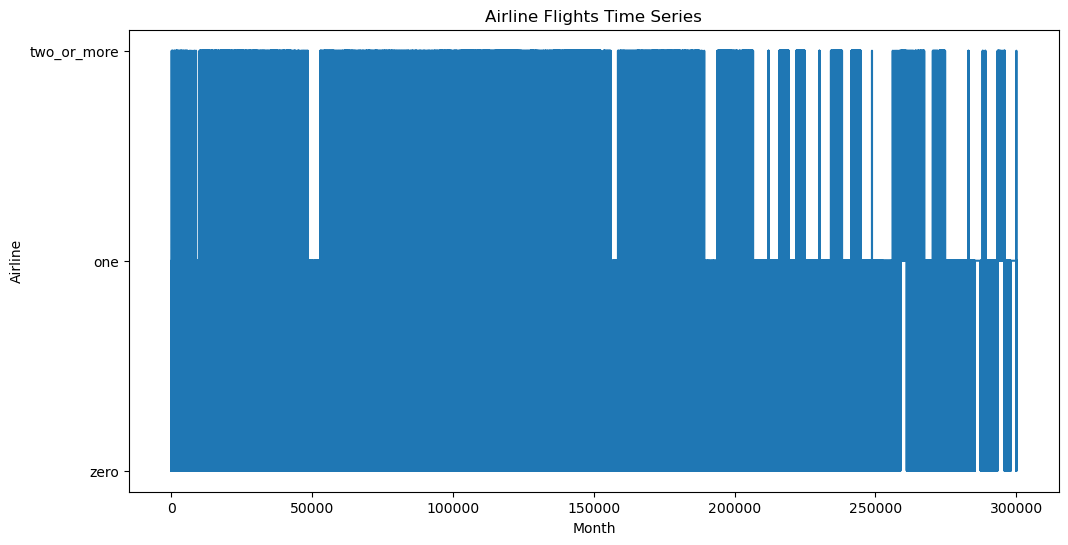

In [12]:
# Now lets plot the airline column 
plt.figure(figsize=(12,6))
plt.plot(df["stops"])
plt.xlabel("Month")
plt.ylabel("Airline")
plt.title("Airline Flights Time Series")
plt.show()  


---

## 📊 Individual Column Visualizations

Let's create plots for each column in the dataset to understand their distributions and patterns.

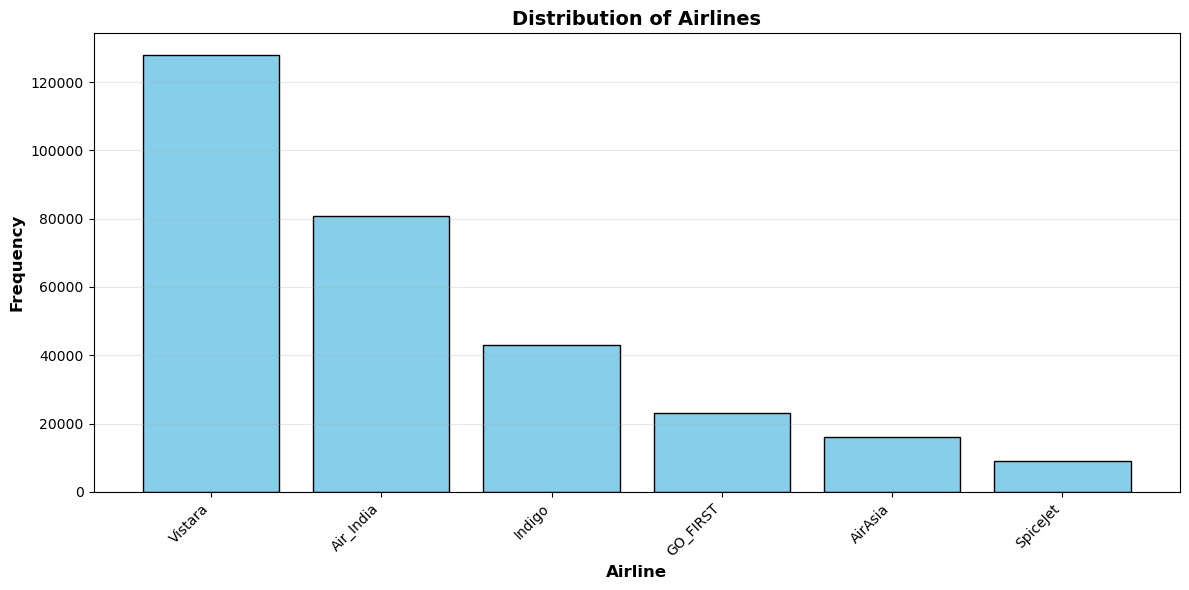

In [14]:
# 1. Airline Column - Bar Plot
plt.figure(figsize=(12, 6))
airline_counts = df['airline'].value_counts()
plt.bar(airline_counts.index, airline_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Airline', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Airlines', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

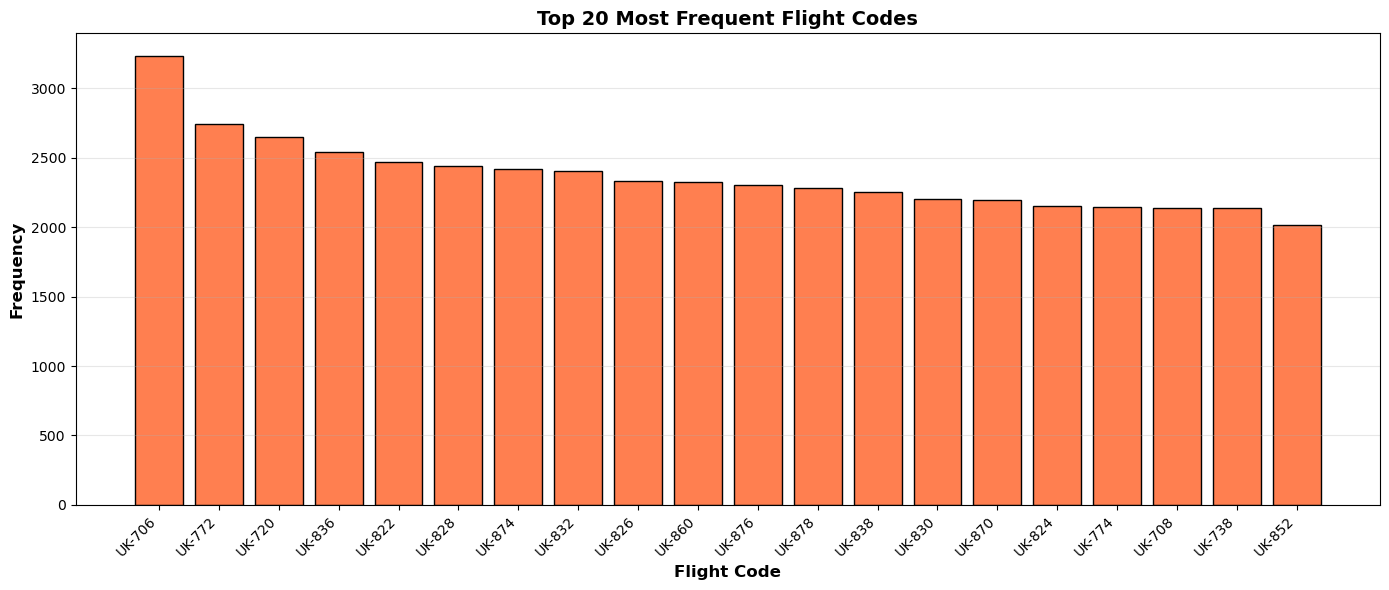

In [15]:
# 2. Flight Column - Top 20 Flights
plt.figure(figsize=(14, 6))
flight_counts = df['flight'].value_counts().head(20)
plt.bar(range(len(flight_counts)), flight_counts.values, color='coral', edgecolor='black')
plt.xlabel('Flight Code', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 20 Most Frequent Flight Codes', fontsize=14, fontweight='bold')
plt.xticks(range(len(flight_counts)), flight_counts.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

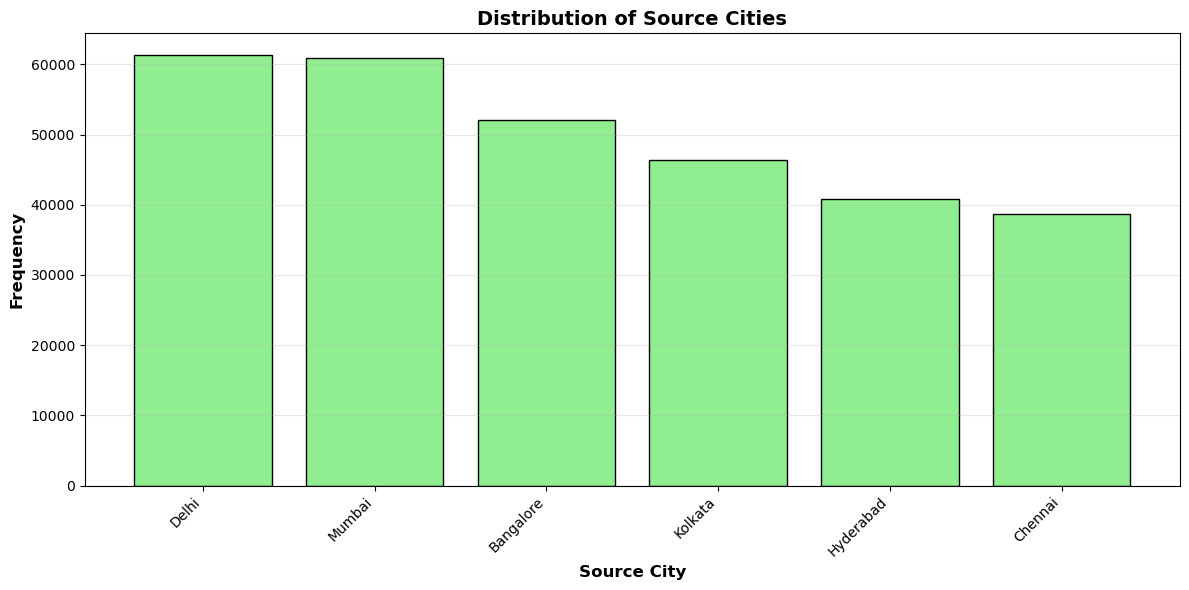

In [16]:
# 3. Source City Column
plt.figure(figsize=(12, 6))
source_counts = df['source_city'].value_counts()
plt.bar(source_counts.index, source_counts.values, color='lightgreen', edgecolor='black')
plt.xlabel('Source City', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Source Cities', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

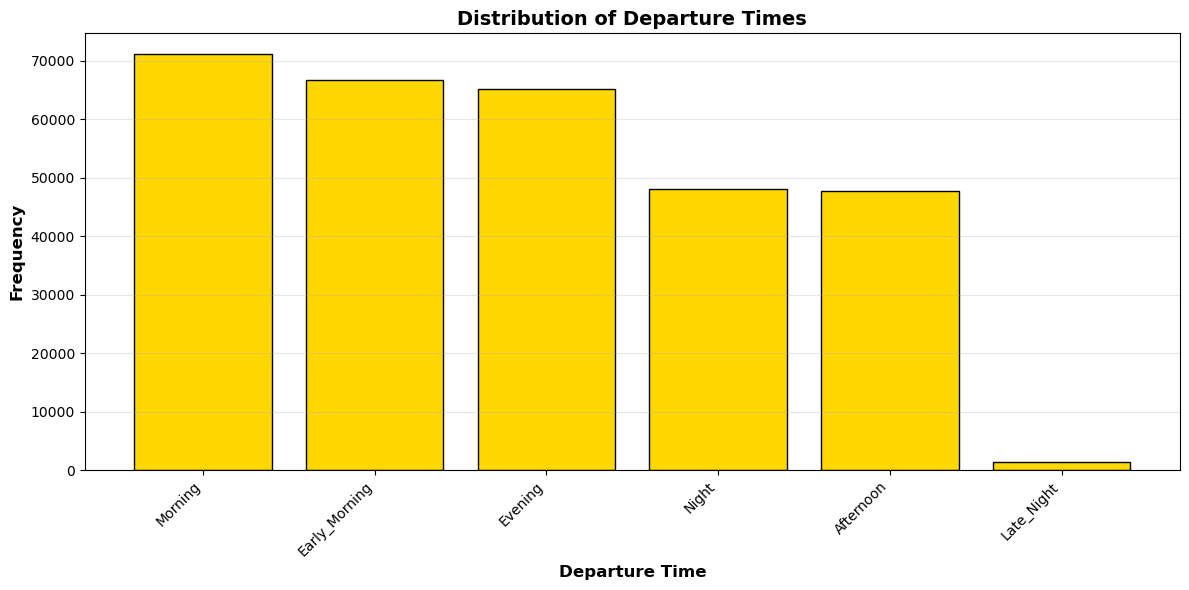

In [17]:
# 4. Departure Time Column
plt.figure(figsize=(12, 6))
departure_counts = df['departure_time'].value_counts()
plt.bar(departure_counts.index, departure_counts.values, color='gold', edgecolor='black')
plt.xlabel('Departure Time', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Departure Times', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

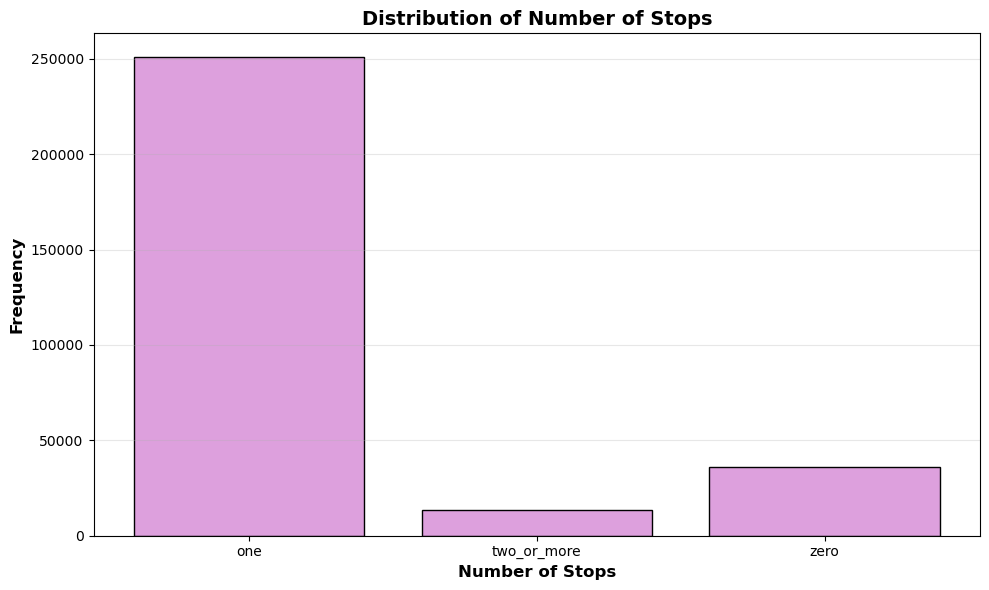

In [18]:
# 5. Stops Column
plt.figure(figsize=(10, 6))
stops_counts = df['stops'].value_counts().sort_index()
plt.bar(stops_counts.index.astype(str), stops_counts.values, color='plum', edgecolor='black')
plt.xlabel('Number of Stops', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Number of Stops', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

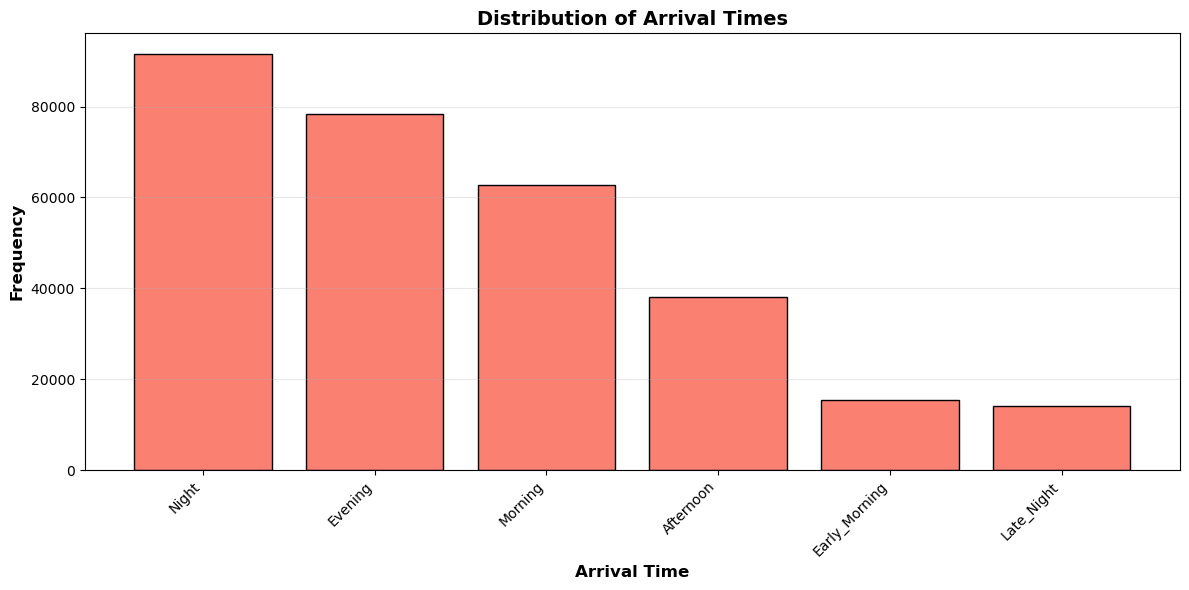

In [19]:
# 6. Arrival Time Column
plt.figure(figsize=(12, 6))
arrival_counts = df['arrival_time'].value_counts()
plt.bar(arrival_counts.index, arrival_counts.values, color='salmon', edgecolor='black')
plt.xlabel('Arrival Time', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Arrival Times', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

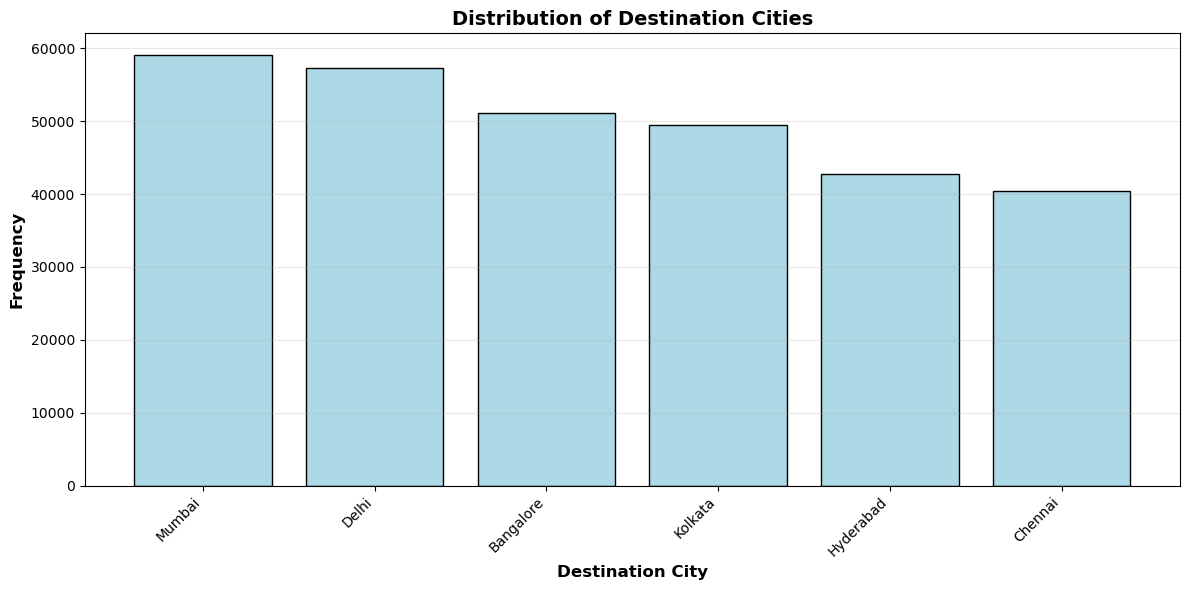

In [20]:
# 7. Destination City Column
plt.figure(figsize=(12, 6))
destination_counts = df['destination_city'].value_counts()
plt.bar(destination_counts.index, destination_counts.values, color='lightblue', edgecolor='black')
plt.xlabel('Destination City', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Destination Cities', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

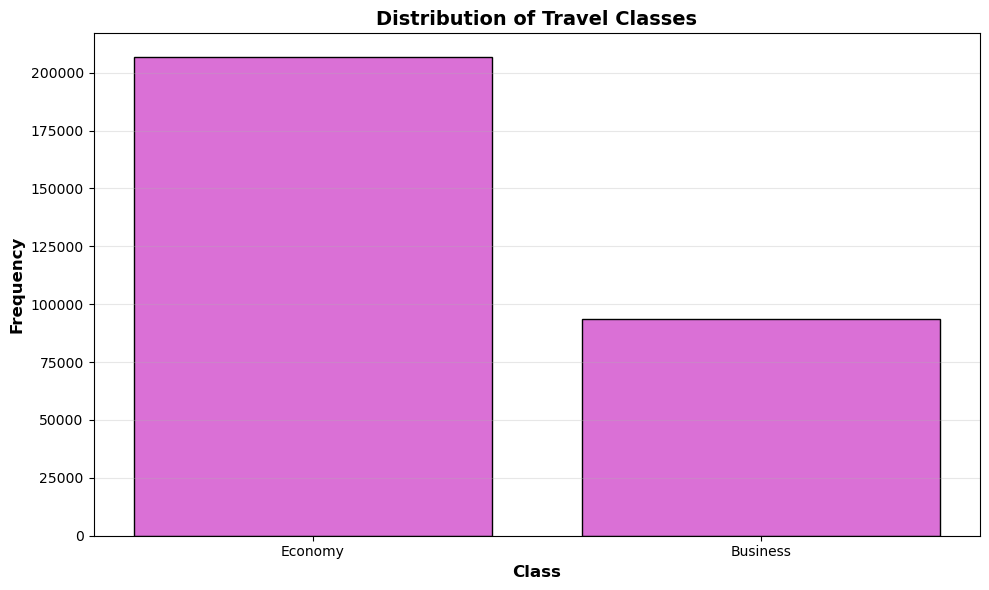

In [21]:
# 8. Class Column
plt.figure(figsize=(10, 6))
class_counts = df['class'].value_counts()
plt.bar(class_counts.index, class_counts.values, color='orchid', edgecolor='black')
plt.xlabel('Class', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Travel Classes', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

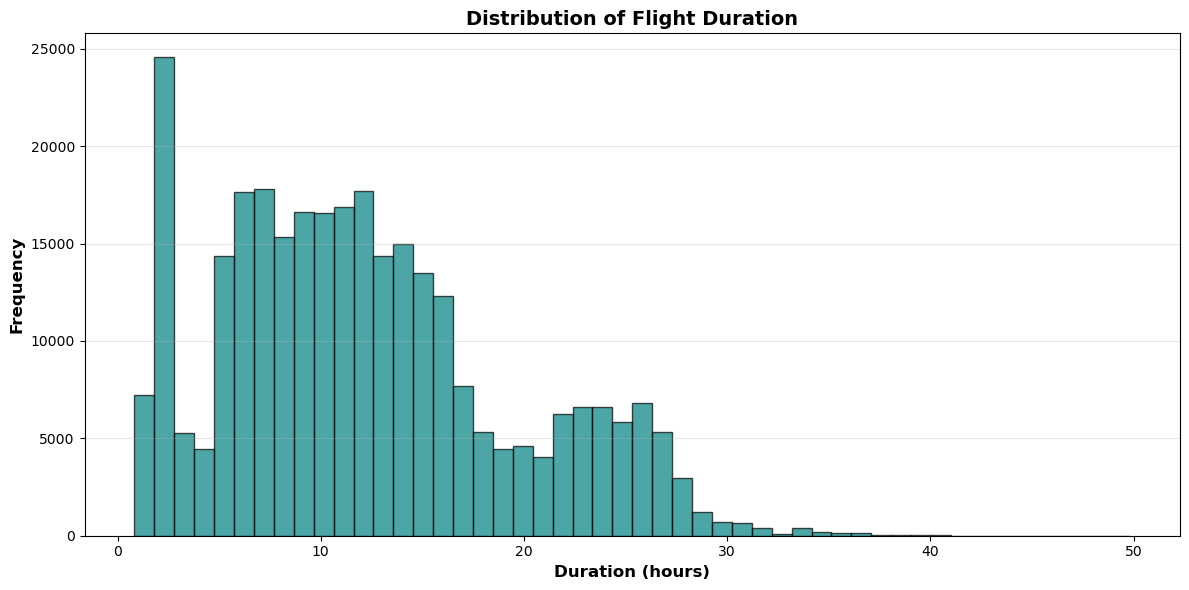

In [22]:
# 9. Duration Column - Histogram
plt.figure(figsize=(12, 6))
plt.hist(df['duration'], bins=50, color='teal', edgecolor='black', alpha=0.7)
plt.xlabel('Duration (hours)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Flight Duration', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

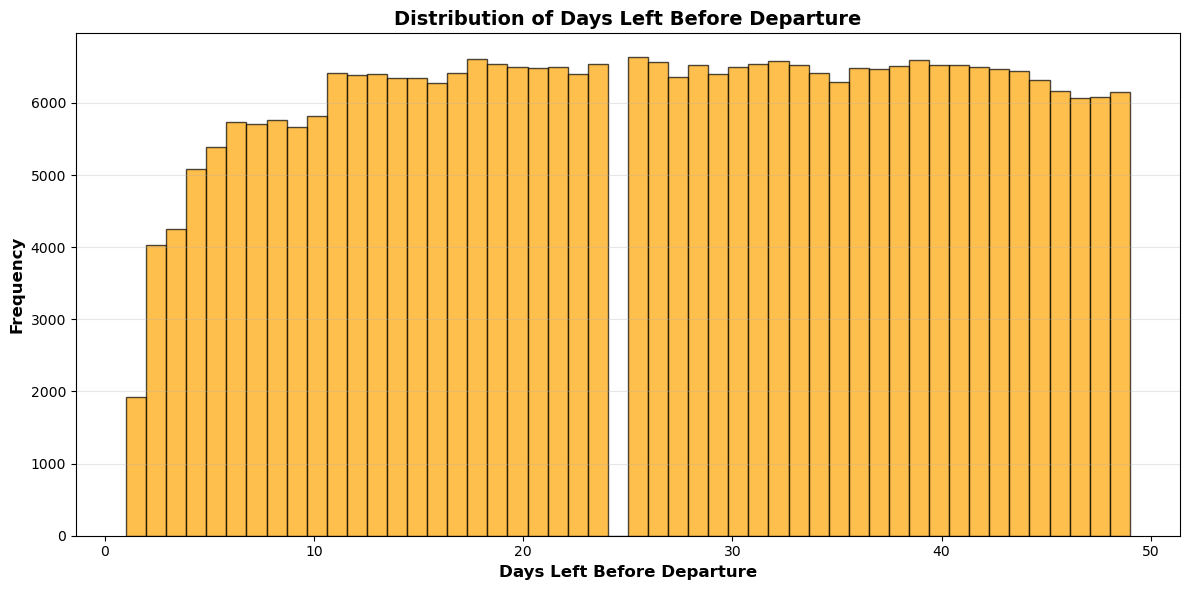

In [23]:
# 10. Days Left Column - Histogram
plt.figure(figsize=(12, 6))
plt.hist(df['days_left'], bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Days Left Before Departure', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Days Left Before Departure', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

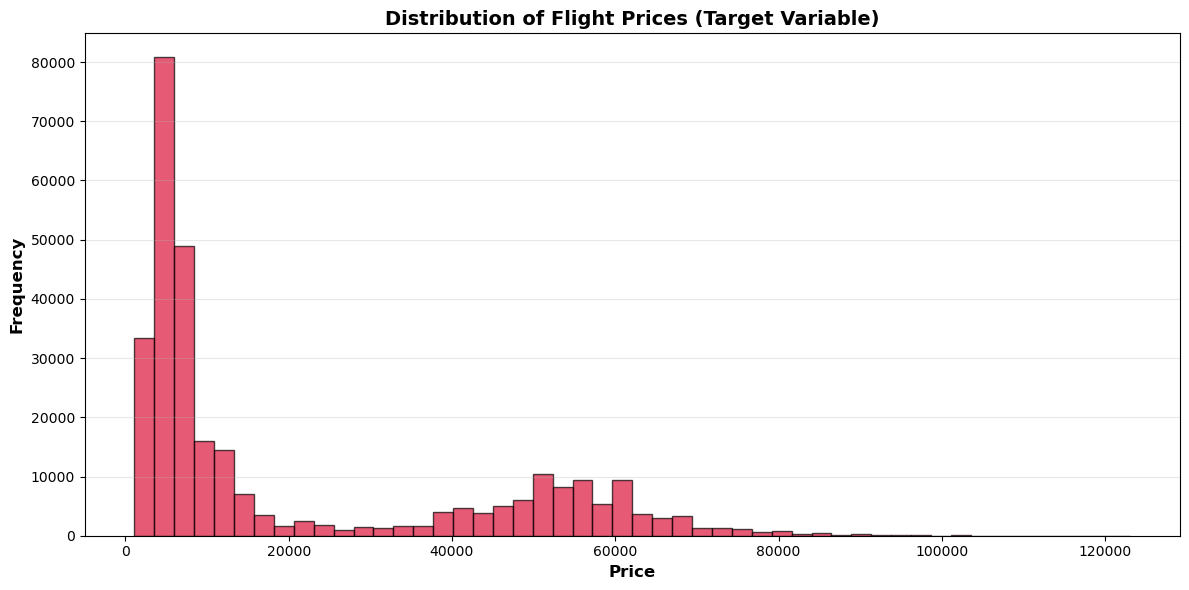

In [24]:
# 11. Price Column - Histogram
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=50, color='crimson', edgecolor='black', alpha=0.7)
plt.xlabel('Price', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Flight Prices (Target Variable)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

---

## 📈 Summary: All Columns Overview

Let's create a comprehensive view showing statistics for all columns.

In [25]:
# Display statistical summary for all columns
print("=" * 80)
print("NUMERICAL COLUMNS SUMMARY")
print("=" * 80)
print(df[['duration', 'days_left', 'price']].describe())

print("\n" + "=" * 80)
print("CATEGORICAL COLUMNS SUMMARY")
print("=" * 80)
categorical_cols = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 
                    'arrival_time', 'destination_city', 'class']

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most common: {df[col].value_counts().index[0]} ({df[col].value_counts().values[0]} occurrences)")

NUMERICAL COLUMNS SUMMARY
            duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000

CATEGORICAL COLUMNS SUMMARY

AIRLINE:
  Unique values: 6
  Most common: Vistara (127859 occurrences)

FLIGHT:
  Unique values: 1561
  Most common: UK-706 (3235 occurrences)

SOURCE_CITY:
  Unique values: 6
  Most common: Delhi (61343 occurrences)

DEPARTURE_TIME:
  Unique values: 6
  Most common: Morning (71146 occurrences)

STOPS:
  Unique values: 3
  Most common: one (250863 occurrences)

ARRIVAL_TIME:
  Unique values: 6
  Most common: Night (91538 occurrences)

DESTINATION_CITY:
  Unique values: 6
  Most c